# EDA

In [1]:
import os

import numpy as np
import pandas as pd

import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns

from config import *

params

## import data

In [2]:
df = pd.read_csv(args['train_path'])
print(df.shape)
df.head()

(617, 58)


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

- id: 'Id'
- y_data: 'Class'

In [4]:
df_X = df.iloc[:, 1:-1]
df_y = df.iloc[:, [-1]]

df_X.shape, df_y.shape

((617, 56), (617, 1))

data_descr

In [5]:
num_cols = []
bin_cols = []
cat_cols = []

for colname in df_X.columns:
    if df[colname].dtype in ['int64', 'float64']:
        if len(df_X[colname].dropna().unique()) == 2:
            bin_cols.append(colname)
        num_cols.append(colname)
    else:
        cat_cols.append(colname)

len(num_cols), len(bin_cols), len(cat_cols)

(55, 0, 1)

수치형 데이터의 분포

In [6]:
print("num_cols: ", num_cols)

num_cols:  ['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL']


In [7]:
df_X[num_cols].describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,11.516657,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,35.851039,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000


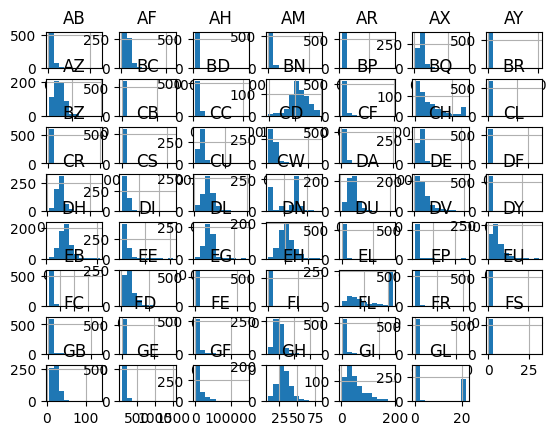

In [8]:
df_X[num_cols].hist()
plt.show()

In [9]:
from scipy.stats import skew

In [10]:
positive_skewed_cols = []
negative_skewed_cols = []

for col in num_cols:
    # Calculate skewness
    skewness = skew(df_X[col], nan_policy='omit')
    exceptions = len(df_X[col].unique()) > 2
    print(f"{col} skewness: ", skewness)
    if (skewness >= 1) and exceptions:
        positive_skewed_cols.append(col)
    elif (skewness <= -1) and exceptions:
        negative_skewed_cols.append(col)

print(positive_skewed_cols)
print(negative_skewed_cols)

AB skewness:  5.912825377927843
AF skewness:  3.7419318698262836
AH skewness:  10.069627203234399
AM skewness:  6.419314027017137
AR skewness:  13.227018034703182
AX skewness:  4.390213221355146
AY skewness:  24.211276528766106
AZ skewness:  0.7980429092412479
BC skewness:  19.6787965898642
BD  skewness:  10.429686338704213
BN skewness:  -0.45172890204387256
BP skewness:  6.448843656531887
BQ skewness:  1.3770252478318286
BR skewness:  21.751449440377502
BZ skewness:  22.139986198148677
CB skewness:  8.754170049498152
CC skewness:  5.555062857495959
CD  skewness:  4.077291494752704
CF skewness:  9.279403612205343
CH skewness:  6.259516090079507
CL skewness:  11.371107234514387
CR skewness:  2.442479946981033
CS skewness:  7.92549757070579
CU skewness:  0.9586879831390496
CW  skewness:  -0.4051426214868654
DA skewness:  1.640508689901399
DE skewness:  2.034461525445426
DF skewness:  13.765326844530309
DH skewness:  0.7706672765617675
DI skewness:  4.390504744839758
DL skewness:  1.24372

In [11]:
positive_skewed_cols

['AB',
 'AF',
 'AH',
 'AM',
 'AR',
 'AX',
 'AY',
 'BC',
 'BD ',
 'BP',
 'BQ',
 'BR',
 'BZ',
 'CB',
 'CC',
 'CD ',
 'CF',
 'CH',
 'CL',
 'CR',
 'CS',
 'DA',
 'DE',
 'DF',
 'DI',
 'DL',
 'DU',
 'DV',
 'DY',
 'EB',
 'EE',
 'EG',
 'EH',
 'EP',
 'EU',
 'FC',
 'FD ',
 'FE',
 'FI',
 'FL',
 'FR',
 'FS',
 'GB',
 'GE',
 'GF',
 'GI']

In [12]:
print('======= positive skewed transform =======')
for col in positive_skewed_cols:
    # log transform
    df_X[col] = np.log1p(df_X[col])
    print(col)

print('======= negative skewed transform =======')
for col in negative_skewed_cols:
    df_X[col] = np.expm1(df_X[col])
    print(col)

======= positive skewed transform =======
AB
AF
AH
AM
AR
AX
AY
BC
BD 
BP
BQ
BR
BZ
CB
CC
CD 
CF
CH
CL
CR
CS
DA
DE
DF
DI
DL
DU
DV
DY
EB
EE
EG
EH
EP
EU
FC
FD 
FE
FI
FL
FR
FS
GB
GE
GF
GI
======= negative skewed transform =======


In [13]:
# 이전보다 좋아진 것을 확인
for col in num_cols:
    # Calculate skewness
    skewness = skew(df_X[col], nan_policy='omit')
    print(f"{col} skewness: ", skewness)

AB skewness:  2.5776239703010146
AF skewness:  -1.5410867207962313
AH skewness:  3.305308964065349
AM skewness:  0.9367390037136012
AR skewness:  4.5488857064328485
AX skewness:  -0.0064448305722064475
AY skewness:  19.08931392732079
AZ skewness:  0.7980429092412479
BC skewness:  2.296201712547051
BD  skewness:  1.0382003711984733
BN skewness:  -0.45172890204387256
BP skewness:  1.4947787652931444
BQ skewness:  -0.308730066114246
BR skewness:  -0.34870530348614404
BZ skewness:  2.3835216653955205
CB skewness:  0.849073456969382
CC skewness:  2.0780008064045647
CD  skewness:  0.1117151120282919
CF skewness:  -0.14049005082431773
CH skewness:  5.696578742546678
CL skewness:  6.108859454802184
CR skewness:  0.5154365892944491
CS skewness:  0.4948806689288039
CU skewness:  0.9586879831390496
CW  skewness:  -0.4051426214868654
DA skewness:  -0.7579632022878077
DE skewness:  0.016838839909117807
DF skewness:  3.7309777624078118
DH skewness:  0.7706672765617675
DI skewness:  0.712982321279641

In [14]:
# for col in num_cols:
#     iqr = df[col].quantile(q=.75) - df[col].quantile(q=.25)
#     lower_bound = df[col].quantile(q=.25) - iqr * 1.5
#     upper_bound = df[col].quantile(q=.75) + iqr * 1.5
#     # print(lower_bound, upper_bound)

#     number_of_outliers = df[
#         (df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
#     print(number_of_outliers)
    
#     df.loc[df[col] < lower_bound, col] = lower_bound
#     df.loc[df[col] > upper_bound, col] = upper_bound

/tmp/ipykernel_191375/747072575.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


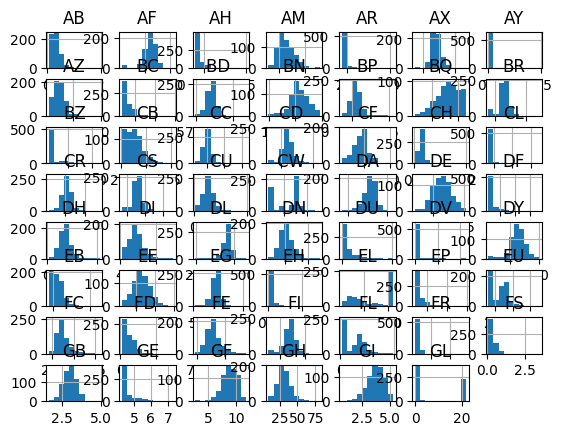

In [15]:
df_X.hist(column=num_cols)
plt.tight_layout()
plt.show()

범주형 데이터의 분포

In [16]:
df_X[cat_cols].describe()

,EJ
count,617
unique,2
top,B
freq,395


In [17]:
onehot_cols = []
for colname in cat_cols:
    if len(df_X[colname].unique()) \
        <= df_X.shape[0]*0.1:
        onehot_cols.append(colname)

In [18]:
cat_cols

['EJ']

# preprocessing

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

In [20]:
for col in onehot_cols:
    mode = df_X[col].mode()[0]
    df_X[col].fillna(mode, inplace=True)

In [21]:
ohe = OneHotEncoder()
ohe = ohe.fit(df_X[onehot_cols])
ohe.get_feature_names_out()

array(['EJ_A', 'EJ_B'], dtype=object)

In [22]:
df_cat_array = ohe.transform(df_X[onehot_cols]).toarray()
df_cat_array.shape

(617, 2)

In [23]:
df_X[ohe.get_feature_names_out()] = df_cat_array
df_X = df_X.drop(columns=cat_cols)

In [24]:
# df = df.drop(columns=['Name', 'Ticket'])
# df.columns

# Correlation analysis with Pearson

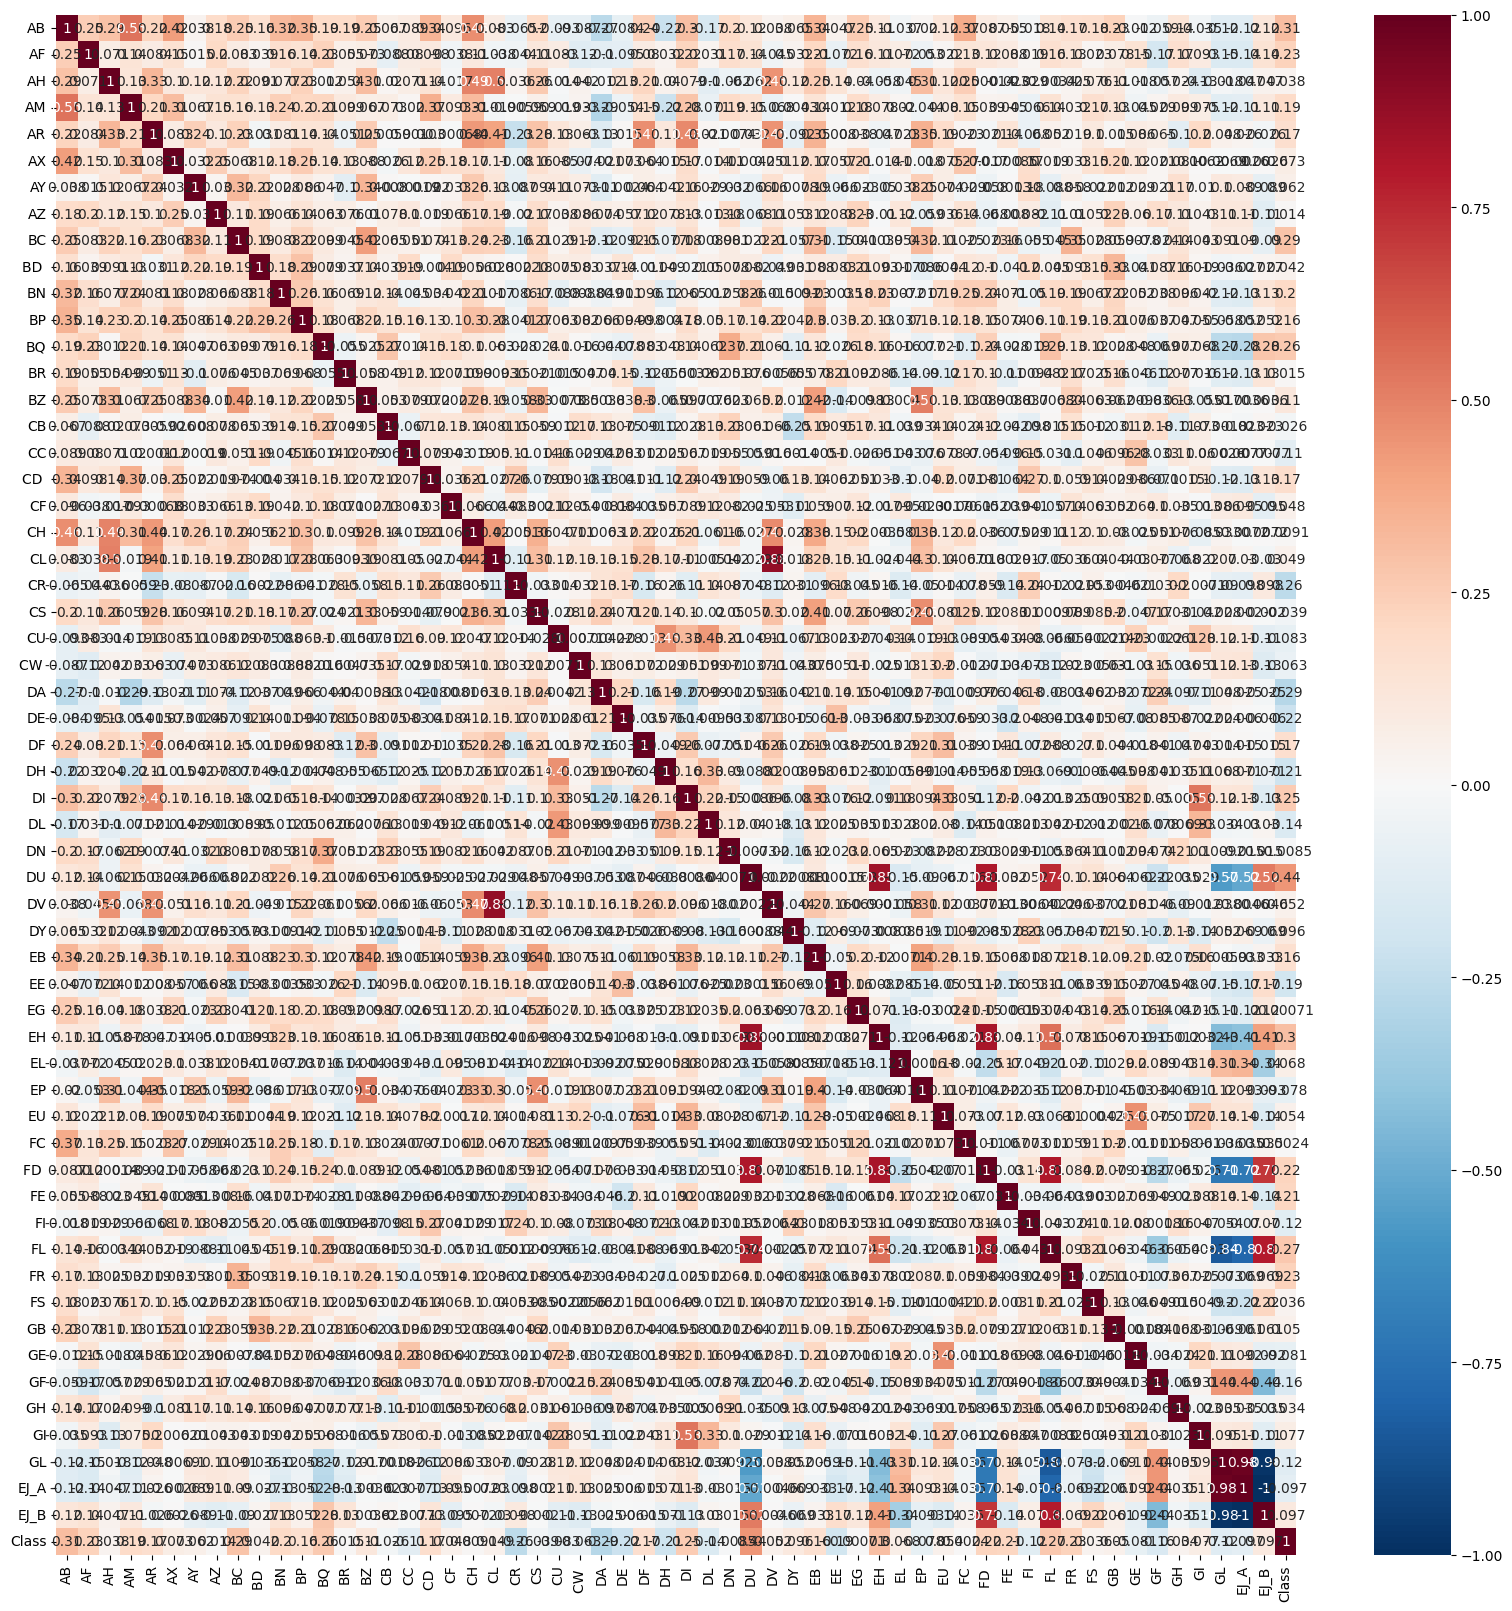

In [25]:
df1 = pd.concat([df_X, df_y], axis=1)
df_corr = df1.corr()

plt.figure(figsize = (20,20))
sns.heatmap(df_corr, annot=True, cmap='RdBu_r')
plt.show()
# ex.imshow(df_corr, color_continuous_scale='RdBu_r', text_auto=True, width=1000, height=1000)
## https://plotly.com/python/heatmaps/

In [26]:
df_corr['Class'][df_corr['Class'] > 0.2]

AB       0.311176
AF       0.226799
BC       0.288254
BQ       0.263770
DI       0.250773
DU       0.439157
EH       0.297211
FD       0.222519
FE       0.211906
FL       0.271289
FR       0.231392
Class    1.000000
Name: Class, dtype: float64

In [27]:
df_y#.value_counts()

,Class
0,1
1,0
2,0
3,0
4,1
...,...
612,0
613,0
614,0
615,0


In [30]:
ohe_y = OneHotEncoder()
ohe_y = ohe_y.fit(df_y)
encoded_df = pd.DataFrame(
    ohe_y.fit_transform(df_y).toarray(),
    columns=ohe_y.get_feature_names_out())

In [31]:
encoded_df

,Class_0,Class_1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
612,1.0,0.0
613,1.0,0.0
614,1.0,0.0
615,1.0,0.0
